In [1]:
# Importing all required modules
import pandas as pd
import numpy as np
import scipy.stats as stats #contains t test
#import statsmodels.api as sm #contains z test

### Question 1

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

Minitab File : Cutlets.mtw


In [2]:
#importing the cutlets.csv file required for the question
cutlets = pd.read_csv("Cutlets.csv")
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


Per Question, manager wants to determine whether there is any significant difference in the diameter of the cutlets between two units.

Null Hypothesis (H0): D1 = D2  
Alternative Hypothesis (Ha): D1 <> D2  
alpha = 0.05 (significant level at 95%)

Alternative Hypothesis is there is significant difference in the diameter of the cutlets between two units.

In [3]:
# test to see if the two units are significantly different
# if the columns have null or nan values drop them
#t_stat, pvalue = stats.ttest_ind(cutlets["Unit A"].dropna(), cutlets["Unit B"].dropna())

t_stat, pvalue = stats.ttest_ind(cutlets["Unit A"], cutlets["Unit B"])
print(round(pvalue, 5))

0.47224


Since the pvalue (0.47224) is greater (>) than 0.05, we "fail to reject null hypothesis" (i.e. accept null hypothesis)

There is strong evidence in support of null hypothesis that the diameter is not significantly different between two units.

### Question 2

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 
 
Minitab File: LabTAT.mtw

In [4]:
labtat = pd.read_csv("LabTAT.csv")
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


Per Question, is any difference in average TAT among the different laboratories at 5% significance level

Null Hypothesis (H0): Mean1 = Mean2 = Mean3 = Mean4  
Alternative Hypothesis (Ha): Atleast one mean is different  
alpha = 0.05 (significant level at 95%)  

Alternative Hypothesis is there is difference in average TAT among the different laboratories.

In [5]:
f_stat, pvalue = stats.f_oneway(labtat["Laboratory 1"], labtat["Laboratory 2"], 
                                labtat["Laboratory 3"], labtat["Laboratory 4"])
print(pvalue)

2.1156708949992414e-57


Since, the p-value is less than 0.05, we reject null hypothesis.
There is strong evidence in support of alternative hypothesis, that is, at least one mean is different among the laboratories.

### Question 3

Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.
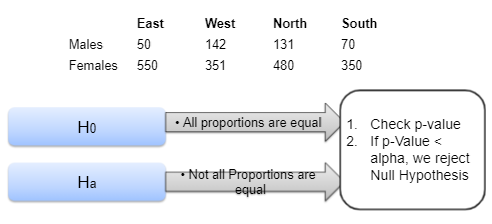

Minitab File : Buyer Ratio.mtw

In [6]:
buyerRatio = pd.read_csv("BuyerRatio.csv")
buyerRatio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [7]:
# making table with list of list
table = [[50, 142, 131, 70],
         [435, 1523, 1356, 750]]

In [8]:
chi_stats, pvalue, dof, expd_val = stats.chi2_contingency(table)
print(round(pvalue, 5))

0.66031


In [9]:
# without converting to table
#all string columns needs to be dropped
#chi_stats2, pvalue2, dof2, expd_val2 = stats.chi2_contingency(buyerRatio.drop("Observed Values", axis=1))
#print(chi_stats2, pvalue2, dof2, expd_val2)

Since, the p-value (0.66031) is greater than 0.05, we fail to reject null hypothesis. (We accept null hypothesis)
There is strong evidence in support of null hypothesis, that is, male & female buyer rations are similar across regions.

### Question 4
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Minitab File: CustomerOrderForm.mtw

In [10]:
custOrderForm = pd.read_csv("CustomerOrderForm.csv")
custOrderForm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


Per question, whether the defective % varies per country

Null hypothesis (H0): defective % is same across the countries  
Alternative hypothesis (Ha): defective % is varies across the countries  
alpha: 0.05

In [11]:
custOrderForm.head(2)

Phillippines   Indonesia       Malta       India
0   Error Free  Error Free   Defective  Error Free
1   Error Free  Error Free  Error Free   Defective

In [27]:
# creates a list in [Error Free, Defective] format
phillipines = [count for count in custOrderForm['Phillippines'].value_counts()]
indonesia = [count for count in custOrderForm['Indonesia'].value_counts()]
malta = [count for count in custOrderForm['Malta'].value_counts()]
india = [count for count in custOrderForm['India'].value_counts()]

[280, 20]

In [29]:
# create a table of list
custOrderTable = [phillipines, indonesia, malta, india]
print(custOrderTable)

[[271, 29], [267, 33], [269, 31], [280, 20]]


In [31]:
cof_chi_stat, cof_pvalue, cof_dof, cof_expval = stats.chi2_contingency(custOrderTable)
print(round(cof_pvalue, 5))

0.2771


Since, the p-value (0.2771) is greater than 0.05, we fail to reject null hypothesis (We accept null hypothesis).  
There is strong evidence in support of null hypothesis, that is, defective % is similar across the countries.